### 环境设置

In [1]:
import sys
import os

# 添加 src 到路径，便于导入
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '../')))

### 导入所需要的包

In [ ]:
from typing import List, Set, Tuple
from shapely.geometry import Point, Polygon, LineString, box
import matplotlib.pyplot as plt
from heapq import heappush, heappop

# 自定义模块导入
from CADAlgo.check import is_valid_line
from CADAlgo.generate import generate_connection_lines, generate_sampled_points


### 设置 notebook 的 matplotlib 后端

In [ ]:
# 使用 notebook 的 matplotlib 后端
%matplotlib inline

### 初始化条件
  - 多边形边界
  - 引出点
  - 障碍物

In [3]:
# 定义多边形边界和关键点
polygon = Polygon([(0, 0), (50, 25), (100, 0), (100, 100), (0, 100), (25, 50)])
points = [
    Point(25, 25), Point(75, 25), Point(75, 75),
    Point(25, 75), Point(27.56, 20.61), Point(30.23, 21.46), Point(30, 30)
]

obstacles = [box(84, 72, 88, 78)]


In [4]:
# 生成连接线
lines = generate_connection_lines(points, polygon, obstacles, samples_per_edge=20)


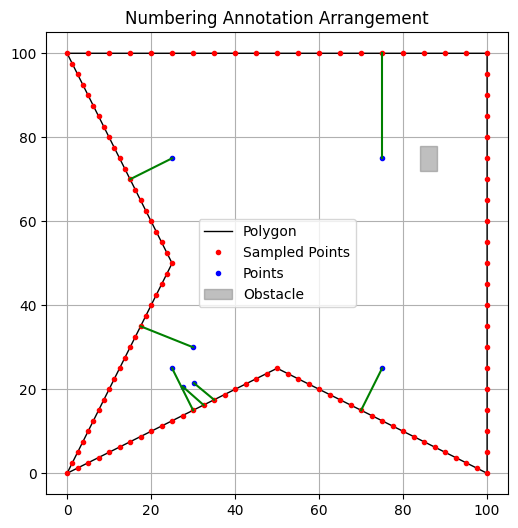

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制多边形
x_poly, y_poly = polygon.exterior.xy
ax.plot(x_poly, y_poly, 'k-', linewidth=1, label='Polygon')

# 多边形采样点
sampled = generate_sampled_points(polygon)
ax.plot([p.x for p in sampled], [p.y for p in sampled], 'ro', markersize=3, label='Sampled Points')

# 原始点
ax.plot([p.x for p in points], [p.y for p in points], 'bo', markersize=3, label='Points')

# 障碍物绘制
for idx, obstacle in enumerate(obstacles):
    x_obs, y_obs = obstacle.exterior.xy
    label = "Obstacle" if idx == 0 else None
    ax.fill(x_obs, y_obs, color='gray', alpha=0.5, label=label)

# 连接线
for line in lines:
    x_line, y_line = line.xy
    ax.plot(x_line, y_line, color='green', linewidth=1.5)

ax.set_aspect('equal')
ax.set_title("Numbering Annotation Arrangement")
ax.legend()
ax.grid(True)
plt.show()
